## Covid 19 Analysis using Lgbm

In [365]:
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
%matplotlib inline

In [366]:
df = pd.read_feather('data/covid19_data')
df['Province_State'] = df['Province_State'].astype(str)
df['Country_Region'] = df['Country_Region'].astype(str)
for c in df:
    if df[c].dtype == 'bool':
        df[c] = df[c].astype('int')

In [367]:
encoders = {}
for col in df:
    if df[col].dtype == 'object':
        lm = LabelEncoder()
        lm.fit(df[col])
        encoders[col] = lm
        df[col] = lm.transform(df[col])

In [368]:
df['Country_Region'].describe()

count    22644.000000
mean        95.163399
std         58.640210
min          0.000000
25%         36.000000
50%         91.500000
75%        165.000000
max        179.000000
Name: Country_Region, dtype: float64

In [369]:
df

,Province_State,Country_Region,Date,weekday,day,Density,Population,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,...,Health_exp_per_capita_USD_2016_NA,per_capita_exp_PPP_2016_NA,External_health_exp_pct_2016_NA,Physicians_per_1000_2009-18_NA,Nurse_midwife_per_1000_2009-18_NA,Specialist_surgical_per_1000_2008-18_NA,Completeness_of_birth_reg_2009-18_NA,Completeness_of_death_reg_2008-16_NA,ConfirmedCases,Fatalities
0,81,0,2020-01-22,2,22,59.6850,38928.346,10.2,5.1,77.4,...,0,0,0,0,0,0,0,1,0.0,0.0
1,81,0,2020-01-23,3,23,59.6850,38928.346,10.2,5.1,77.4,...,0,0,0,0,0,0,0,1,0.0,0.0
2,81,0,2020-01-24,4,24,59.6850,38928.346,10.2,5.1,77.4,...,0,0,0,0,0,0,0,1,0.0,0.0
3,81,0,2020-01-25,5,25,59.6850,38928.346,10.2,5.1,77.4,...,0,0,0,0,0,0,0,1,0.0,0.0
4,81,0,2020-01-26,6,26,59.6850,38928.346,10.2,5.1,77.4,...,0,0,0,0,0,0,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22639,81,179,2020-03-31,1,91,38.0362,14862.924,9.4,46.5,21.2,...,0,0,0,0,0,0,0,1,8.0,1.0
22640,81,179,2020-04-01,2,92,38.0362,14862.924,9.4,46.5,21.2,...,0,0,0,0,0,0,0,1,8.0,1.0
22641,81,179,2020-04-02,3,93,38.0362,14862.924,9.4,46.5,21.2,...,0,0,0,0,0,0,0,1,9.0,1.0
22642,81,179,2020-04-03,4,94,38.0362,14862.924,9.4,46.5,21.2,...,0,0,0,0,0,0,0,1,9.0,1.0


In [370]:
ind = np.argsort(df['Date'])
df = df.iloc[ind]
#df = df.drop('Date', axis=1)
data = df.reset_index()
data = data.drop('index', axis=1)

In [371]:
data = data.drop('Date', axis=1)
data.to_feather('data/clean_train')

In [372]:
y1, data = data['ConfirmedCases']  , data.drop('ConfirmedCases', axis=1)
y2, data = data['Fatalities']  , data.drop('Fatalities', axis=1)

In [373]:
reg = lgb.LGBMRegressor(n_estimators=20)

In [374]:
data

,Province_State,Country_Region,weekday,day,Density,Population,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,...,Health_exp_public_pct_2016_NA,Health_exp_out_of_pocket_pct_2016_NA,Health_exp_per_capita_USD_2016_NA,per_capita_exp_PPP_2016_NA,External_health_exp_pct_2016_NA,Physicians_per_1000_2009-18_NA,Nurse_midwife_per_1000_2009-18_NA,Specialist_surgical_per_1000_2008-18_NA,Completeness_of_birth_reg_2009-18_NA,Completeness_of_death_reg_2008-16_NA
0,81,0,2,22,59.6850,38928.346,10.200000,5.10,77.400000,57.200000,...,0,0,0,0,0,0,0,0,0,1
1,81,126,2,22,16.4996,5106.626,4.300000,89.10,5.900000,648.300000,...,0,0,0,0,0,0,0,0,0,0
2,35,36,2,22,148.2775,1439323.776,6.823158,56.09,31.065263,1486.794211,...,1,1,1,1,1,1,1,1,1,1
3,81,125,2,22,16.7425,5421.241,10.500000,85.10,14.500000,7477.900000,...,0,0,0,0,0,0,0,0,0,0
4,36,36,2,22,148.2775,1439323.776,6.823158,56.09,31.065263,1486.794211,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22639,81,138,5,95,491.7692,12952.218,6.800000,33.90,6.400000,48.100000,...,0,0,0,0,0,0,0,0,0,1
22640,81,139,5,95,203.8276,53.199,5.700000,43.20,51.500000,930.800000,...,0,0,0,0,0,0,0,0,1,0
22641,81,140,5,95,298.0958,183.627,5.300000,42.00,48.700000,489.800000,...,0,0,0,0,0,0,0,0,0,0
22642,81,142,5,95,556.2459,33.931,6.400000,80.40,18.800000,3012.800000,...,0,0,0,0,1,0,0,0,0,1


### fir with y2 (fatalaties)
check how important each fature 

In [444]:
reg.fit(data, y2)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=20, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [445]:
feature_imp = pd.DataFrame({'columns':data.columns, 'importance':reg.feature_importances_}
                       ).sort_values('importance', ascending=False)

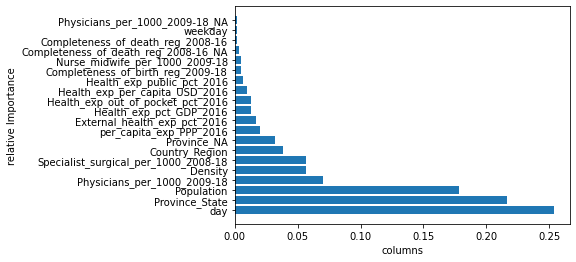

In [446]:
plt.barh(feature_imp[:20]['columns'],feature_imp[:20]['importance']/sum(feature_imp[:20]['importance']))
plt.xlabel('columns')
plt.ylabel('relative Importance')
plt.show()

In [378]:
from scipy.cluster import hierarchy as hc
import scipy

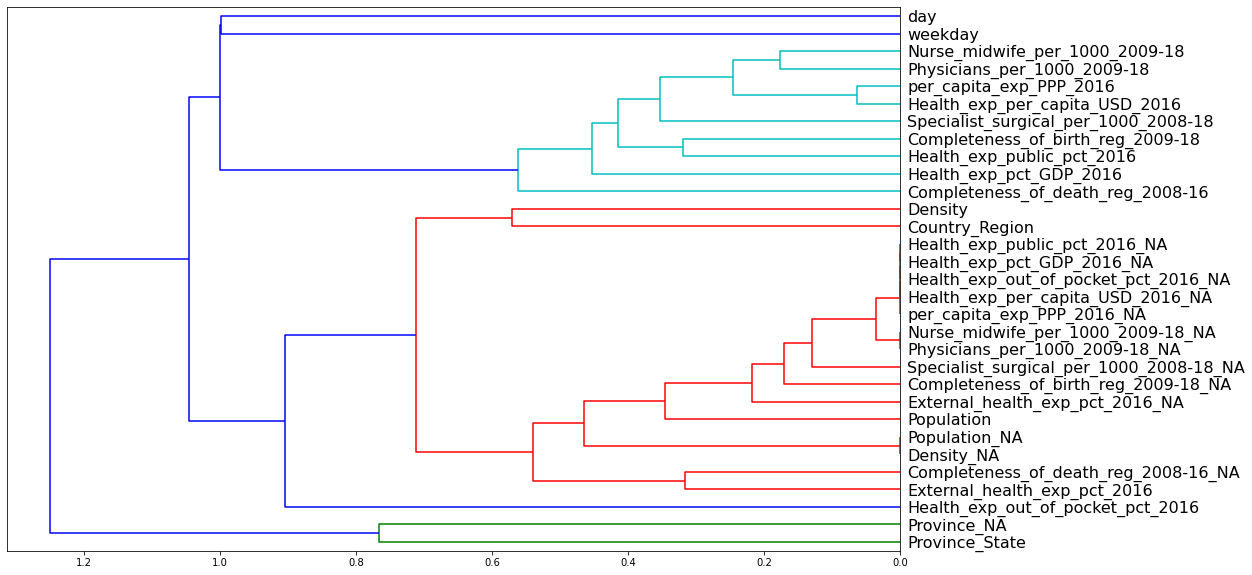

In [379]:
def plot_cluster(df):
    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = hc.distance.squareform(1-corr)
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=(16,10))
    dendrogram = hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=16)
    plt.show()
    
plot_cluster(data)

one thing which seems even more obvious now, we don't need all the features `NA`, they are in clusters:
   * \[`Density_NA`,`Population_NA`\]
   * \[`Health_exp_pct_GDP_2016_NA`, `Health_exp_public_pct_2016_NA`, `Health_exp_out_of_pocket_pct_2016_NA`, `Health_exp_per_capita_USD_2016_NA`, `per_capita_exp_PPP_2016_NA`\]
   
we can just keep one of each of these and be almost confident that nothing will change

In [380]:
data = data.drop(['Density_NA', 'Health_exp_public_pct_2016_NA', 
              'Health_exp_out_of_pocket_pct_2016_NA', 'Health_exp_per_capita_USD_2016_NA', 
              'per_capita_exp_PPP_2016_NA'], 
            axis=1)

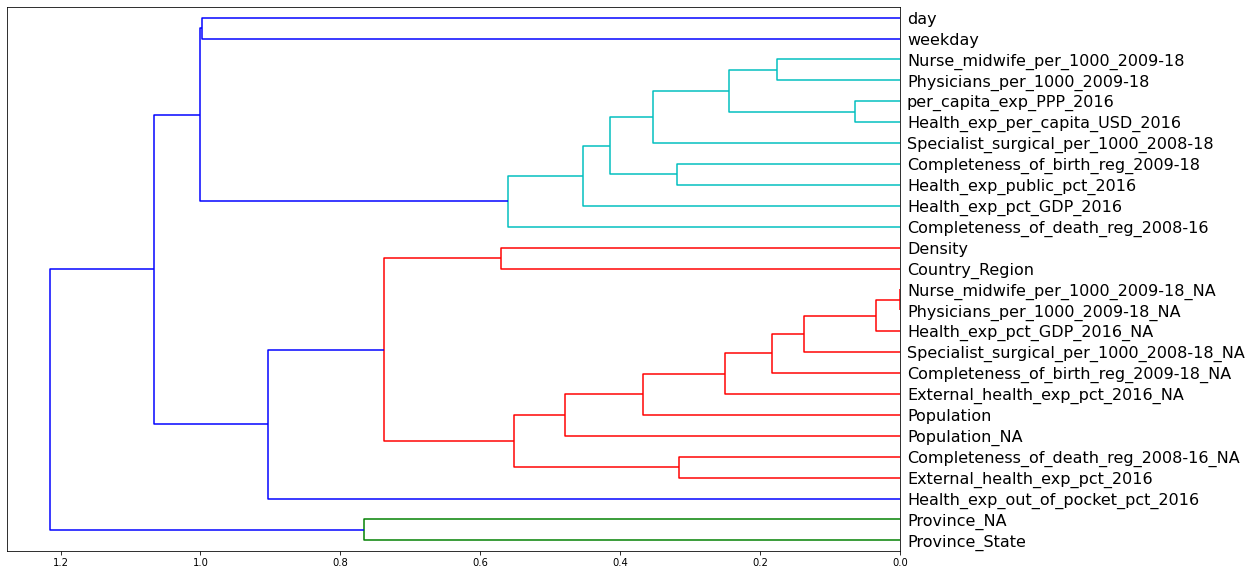

In [381]:
plot_cluster(data)

not very surprising! based on this, we can see 